In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [4]:
keys = get_keys("/Users/sofiaproano/.secret/yelp_api.json")

api_key = keys['api_key']

In [5]:
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key),}
url_params = {'location': 'Jackson Heights',
                'term' : "restaurants, indian",
                'limit' : 50}
response = requests.get(url, headers=headers, params=url_params)

In [7]:
response.json()[

KeyError: 'offset'

In [41]:
df = pd.DataFrame.from_dict(response.json()['businesses'])
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,XUataECnaOfdo4a87NqEFg,samudra-vegetarian-restaurant-and-chaat-house-...,Samudra Vegetarian Restaurant & Chaat House,https://s3-media3.fl.yelpcdn.com/bphoto/Nxo9S5...,False,https://www.yelp.com/biz/samudra-vegetarian-re...,548,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,"{'latitude': 40.7490953, 'longitude': -73.8903...","[delivery, pickup]",$$,"{'address1': '75-18 37th Ave', 'address2': '',...",+17182551757,(718) 255-1757,940.708941
1,lxNU-aBq0yPwBDx-i89ahA,seva-indian-cuisine-astoria-5,Seva Indian Cuisine,https://s3-media4.fl.yelpcdn.com/bphoto/MsQyig...,False,https://www.yelp.com/biz/seva-indian-cuisine-a...,1256,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 40.7653633, 'longitude': -73.9191...","[delivery, pickup]",$$,"{'address1': '3007 34th St', 'address2': '', '...",+17186264440,(718) 626-4440,3034.128374
2,-yqnpiwcyNyn0N8QHFX2FQ,the-gully-astoria,The Gully,https://s3-media2.fl.yelpcdn.com/bphoto/_SJB86...,False,https://www.yelp.com/biz/the-gully-astoria?adj...,172,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,"{'latitude': 40.766743, 'longitude': -73.912307}","[delivery, pickup]",$$,"{'address1': '25-45 Steinway St', 'address2': ...",+17188873933,(718) 887-3933,2571.241897
3,GNPne4Il-itbn2sLbvMo1g,angel-indian-restaurant-jackson-heights,Angel Indian Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/FYaSZK...,False,https://www.yelp.com/biz/angel-indian-restaura...,118,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 40.7473069226623, 'longitude': -7...","[delivery, restaurant_reservation, pickup]",$$,"{'address1': '7414 37th Rd', 'address2': '', '...",+13478480097,(347) 848-0097,1151.903405
4,J4C5Y13rwXQJYR8rKPUDkw,sumnima-kitchen-queens,Sumnima Kitchen,https://s3-media3.fl.yelpcdn.com/bphoto/dQ_afL...,False,https://www.yelp.com/biz/sumnima-kitchen-queen...,9,"[{'alias': 'himalayan', 'title': 'Himalayan/Ne...",5.0,"{'latitude': 40.7463337, 'longitude': -73.9000...",[pickup],NaN,"{'address1': '3904 64th St', 'address2': '', '...",+19173964202,(917) 396-4202,1698.820730
5,IpiGGEXxz-5QVJpijXVmmA,jackson-diner-jackson-heights,Jackson Diner,https://s3-media3.fl.yelpcdn.com/bphoto/D1eggg...,False,https://www.yelp.com/biz/jackson-diner-jackson...,613,"[{'alias': 'indpak', 'title': 'Indian'}]",3.5,"{'latitude': 40.7477755, 'longitude': -73.8915...","[delivery, pickup]",$$,"{'address1': '3747 74th St', 'address2': '', '...",+17186721232,(718) 672-1232,1115.004690
6,Bft47FX6dorGwlUypMrG2w,merit-kabab-palace-jackson-heights,Merit Kabab Palace,https://s3-media3.fl.yelpcdn.com/bphoto/GrY3Qe...,False,https://www.yelp.com/biz/merit-kabab-palace-ja...,109,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,"{'latitude': 40.74711, 'longitude': -73.8912299}","[delivery, pickup]",$,"{'address1': '37-67 74th St', 'address2': '', ...",+17183965827,(718) 396-5827,1168.850216
7,aFhnb8k6H-wD070vvxt4Fw,kababish-jackson-heights,Kababish,https://s3-media1.fl.yelpcdn.com/bphoto/2lqKya...,False,https://www.yelp.com/biz/kababish-jackson-heig...,179,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,"{'latitude': 40.747598, 'longitude': -73.893979}","[delivery, pickup]",$,"{'address1': '70-64 Broadway', 'address2': '',...",+17185655131,(718) 565-5131,1247.418834
8,HsEmXckXmsRAAEVDFCGYYg,namaste-astoria-2,Namaste,https://s3-media3.fl.yelpcdn.com/bphoto/ZgLInv...,False,https://www.yelp.com/biz/namaste-astoria-2?adj...,521,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.0,"{'latitude': 40.7668, 'longitude': -73.92068}","[delivery, pickup]",$$,"{'address1': '31-15 30th Ave', 'address2': Non...",+17186262783,(718) 626-2783,3222.191555
9,8vYGvXF4OyKv2KV0-iIxrA,tikka-indian-grill-astoria,Tikka Indian Grill,https://s3-media2.fl.yelpcdn.com/bphoto/2x-fUg...,False,https://www.yelp.com/biz/tikka-indian-grill-as...,279,"[{'alias': 'indpak', 'title': 'Indian'},

In [87]:
new_df = df[['name', 'review_count', 'rating', 'price']]
df_under_140 = new_df[df['review_count']<= 140]
df_over_140= new_df[(df['review_count']>140) & (df['review_count']<600)]

In [88]:
display(df_under_140.groupby('rating').mean()['review_count'])
df_over_140.groupby('rating').mean()['review_count']

rating
3.0    85.000
3.5    25.000
4.0    62.625
4.5    55.500
5.0    21.000
Name: review_count, dtype: float64

rating
3.0    296.000000
3.5    264.666667
4.0    275.454545
4.5    263.000000
Name: review_count, dtype: float64

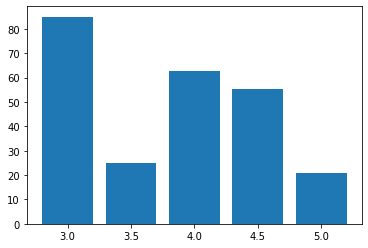

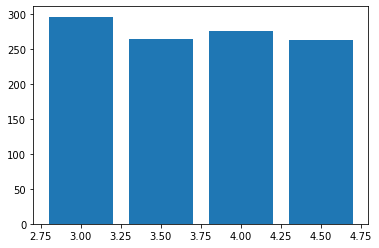

In [89]:
fig, ax = plt.subplots()
height =  df_under_140.groupby('rating').mean()['review_count']
x = height.index
ax.bar(x,height, width=0.4);

fig, ax = plt.subplots()
height2 = df_over_140.groupby('rating').mean()['review_count']
x2 = height2.index
ax.bar(x2,height2, width=0.4);
#height=df.groupby('rating').mean()['review_count']
#x=height.index
#ax.bar(x,height, width=0.5);

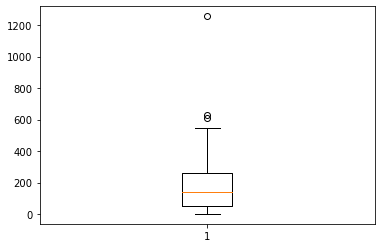

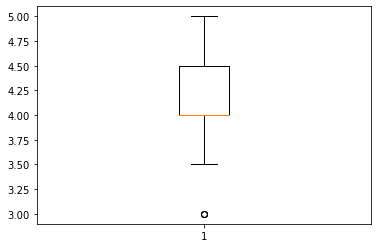

In [84]:
fig5, ax5 = plt.subplots()
ax5.boxplot(df['review_count'], showfliers=True);
fig6, ax6 = plt.subplots()
ax6.boxplot(df['rating']);

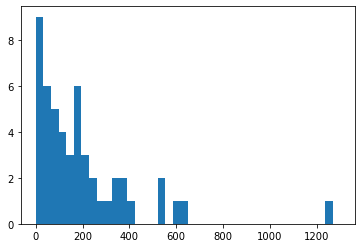

In [83]:
fig7, ax7 = plt.subplots()
ax7.hist(df['review_count'], range =(0,1300), bins=40);